<a href="https://colab.research.google.com/github/suhaschowdaryj/svm/blob/master/shift_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

In [44]:
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


# 1. Load datasets

In [95]:
df = pd.read_csv('sample_shift.csv')

In [46]:
df.head()

,seller_id,year,make,model,trim,body_type,engine_type,mileage,accidents,owners,region,appraisal_date,acquistion_price,listing_date,list_price,sell_date,final_sale_price
0,P10XYZ,2017,Mazda,Mazda6,Grand Touring,sedan,internal-combustion,8500,0.000,1.000,San Francisco,2021-01-01,19000.000,2021-01-03,20300,2021-01-09,18950.000
1,P11XYZ,2015,Chevrolet,Impala,2LT,sedan,internal-combustion,50500,0.000,1.000,Dallas,2021-01-03,13300.000,2021-01-03,17400,2021-03-25,13200.000
2,P12XYZ,2012,Hyundai,Elantra,Limited,sedan,internal-combustion,109378,0.000,4.000,Los Angeles,2021-01-02,3200.000,2021-01-03,3841,2021-01-17,3800.000
3,P13XYZ,2011,Jeep,Grand Cherokee,Laredo,suv,internal-combustion,74600,0.000,1.000,Los Angeles,2021-01-02,10900.000,2021-01-03,14400,2021-01-07,11470.000
4,P14XYZ,2014,Honda,CR-V,LX,suv,internal-combustion,58358,0.000,1.000,San Francisco,2021-01-02,12600.000,2021-01-03,14400,2021-02-01,13450.000


# 2. Exploratory data analysis

In [47]:
print('Number of rows in data set: ', len(df))
print('Number of columns in data set: ', len(df.columns))

Number of rows in data set:  639401
Number of columns in data set:  17


In [48]:
# Column names
column_names = df.columns.to_list()
df.columns

Index(['seller_id', 'year', 'make', 'model', 'trim', 'body_type',
       'engine_type', 'mileage', 'accidents', 'owners', 'region',
       'appraisal_date', 'acquistion_price', 'listing_date', 'list_price',
       'sell_date', 'final_sale_price'],
      dtype='object')

In [49]:
# value counts of data types of features
df.dtypes.value_counts()

object     10
float64     4
int64       3
dtype: int64

### 2.0 Seller id

In [50]:
df['seller_id'].nunique()

12000

There are 639,401 rows and only 12k sellers. Let's explore few sellers.

In [51]:
df['seller_id'].head()

0    P10XYZ
1    P11XYZ
2    P12XYZ
3    P13XYZ
4    P14XYZ
Name: seller_id, dtype: object

In [53]:
df[df.seller_id=='P11XYZ'].head()

,seller_id,year,make,model,trim,body_type,engine_type,mileage,accidents,owners,region,appraisal_date,acquistion_price,listing_date,list_price,sell_date,final_sale_price
1,P11XYZ,2015,Chevrolet,Impala,2LT,sedan,internal-combustion,50500,0.000,1.000,Dallas,2021-01-03,13300.000,2021-01-03,17400,2021-03-25,13200.000
28,P11XYZ,2015,Chevrolet,Impala,2LT,sedan,internal-combustion,50500,0.000,1.000,Dallas,2021-01-03,13300.000,2021-01-11,16950,2021-03-25,13200.000
105,P11XYZ,2015,Chevrolet,Impala,2LT,sedan,internal-combustion,50500,0.000,1.000,Dallas,2021-01-03,13300.000,2021-01-19,16950,2021-03-25,13200.000
467,P11XYZ,2015,Chevrolet,Impala,2LT,sedan,internal-combustion,50500,0.000,1.000,Dallas,2021-01-03,13300.000,2021-01-26,16950,2021-03-25,13200.000
568,P11XYZ,2015,Chevrolet,Impala,2LT,sedan,internal-combustion,50500,0.000,1.000,Dallas,2021-01-03,13300.000,2021-01-25,16950,2021-03-25,13200.000


In [54]:
df[df.seller_id=='P13XYZ'].head()

,seller_id,year,make,model,trim,body_type,engine_type,mileage,accidents,owners,region,appraisal_date,acquistion_price,listing_date,list_price,sell_date,final_sale_price
3,P13XYZ,2011,Jeep,Grand Cherokee,Laredo,suv,internal-combustion,74600,0.000,1.000,Los Angeles,2021-01-02,10900.000,2021-01-03,14400,2021-01-07,11470.000
115,P13XYZ,2011,Jeep,Grand Cherokee,Laredo,suv,internal-combustion,74600,0.000,1.000,Los Angeles,2021-01-02,10900.000,2021-01-05,14400,2021-01-07,11470.000
1786,P13XYZ,2011,Jeep,Grand Cherokee,Laredo,suv,internal-combustion,74600,0.000,1.000,Los Angeles,2021-01-02,10900.000,2021-01-04,14400,2021-01-07,11470.000
8397,P13XYZ,2011,Jeep,Grand Cherokee,Laredo,suv,internal-combustion,74600,0.000,1.000,Los Angeles,2021-01-02,10900.000,2021-01-07,14400,2021-01-07,11470.000
34125,P13XYZ,2011,Jeep,Grand Cherokee,Laredo,suv,internal-combustion,74600,0.000,1.000,Los Angeles,2021-01-02,10900.000,2021-01-06,14400,2021-01-07,11470.000


We can observe that once a car is acquired, It is listed on serveral dates and finally the car is being sold at certain point of time. 

Eventhough we have 639,401 rows, they are only about 12k unique cars. Let's remove the duplicates as the primary focus was on 'acquisition price'.

In [56]:
# delete listing date,list price, sell date 
del_cols = ['listing_date','list_price', 'sell_date']
df.drop(del_cols,axis=1,inplace=True)


In [57]:
# drop duplciates
df = df.drop_duplicates(keep='first')
df = df.reset_index(drop=True)

## 2.1 Target label: 'Acquistion price'


In [62]:
df['acquistion_price'].describe()

count   12006.000
mean    17805.172
std     10111.868
min       100.000
25%     10200.000
50%     16900.000
75%     23800.000
max     68300.000
Name: acquistion_price, dtype: float64

Average acquisition price of the car is ~ 17,805 dollars

In [63]:
# Cars whose acquisition price is less than 1000$. 
# Apparently many of these seems to be old cars
df[df['acquistion_price']<1000].head()

,seller_id,year,make,model,trim,body_type,engine_type,mileage,accidents,owners,region,appraisal_date,acquistion_price,final_sale_price
183,P1268XYZ,2001,Honda,Civic,EX,sedan,internal-combustion,158911,0.000,1.000,Seattle,2021-01-10,800.000,1900.000
185,P1270XYZ,2006,Honda,Odyssey,EX-L,van,internal-combustion,193000,0.000,1.000,Sacramento,2021-01-18,800.000,1800.000
317,P1442XYZ,2006,Nissan,Altima,2.5 S,sedan,internal-combustion,189000,0.000,3.000,Los Angeles,2021-01-25,800.000,1000.000
368,P1512XYZ,2005,Volkswagen,Jetta,GLS,sedan,internal-combustion,117000,0.000,3.000,San Francisco,2021-01-28,600.000,1300.000
610,P1829XYZ,2007,Ford,Fusion,S,sedan,internal-combustion,144500,0.000,1.000,Los Angeles,2021-02-05,900.000,1800.000


### 2.2 Acquistion price distribution

In [66]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)

hist_data = [np.array(df['acquistion_price'].tolist())]
group_labels = ['Distribution plot'] 

fig = ff.create_distplot(hist_data, group_labels)
fig.update_layout(title='Acquisition price distribution')
fig.show()

### 2.3 Boxplots for numerical columns

In [69]:
# Box plots of numerical variables.
import plotly.subplots as sp
numerical_columns_selected = [ 'mileage', 'acquistion_price', 'final_sale_price']

this_figure = sp.make_subplots(rows=len(numerical_columns_selected)//2 + 1, cols=2,
                               subplot_titles=numerical_columns_selected,
                               x_title = 'Feature',
                               y_title = 'Distribution') 

j = 0
for i in numerical_columns_selected:

  row = (j//2)+1
  col = (j%2)+1

  # plotly
  trace_i = px.box(df, y=i)

  figure_traces = []
  for trace in range(len(trace_i["data"])):
      figure_traces.append(trace_i["data"][trace])


  for traces in figure_traces:
      this_figure.append_trace(traces, row=row, col=col)

  j += 1
  

this_figure.update_layout(
    title={
        'text': "Numerical variables box plots",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

this_figure.update_layout(
      autosize=False,
      width=1000,
      height=1000
  )
this_figure.show()

In [70]:
#numerical column stats
df[numerical_columns_selected].describe()

,mileage,acquistion_price,final_sale_price
count,12006.000,12006.000,12002.000
mean,65989.802,17805.172,19036.767
std,43222.976,10111.868,9773.979
min,19.000,100.000,25.000
25%,34000.000,10200.000,12500.000
50%,57000.000,16900.000,18450.000
75%,86942.250,23800.000,24800.000
max,240000.000,68300.000,83000.000


### 2.4 Categorical variables

In [71]:
categorical_columns = ['year', 'make', 'model', 'trim', 'body_type',
       'engine_type', 'accidents', 'owners', 'region']

In [72]:
# Plot distribution of categorical variables.
import plotly.subplots as sp

this_figure = sp.make_subplots(rows=len(categorical_columns)//2 + 1, cols=2,
                               subplot_titles=categorical_columns,
                               x_title = 'Feature',
                               y_title = 'Count') 

j = 0
for i in categorical_columns:

  row = (j//2)+1
  col = (j%2)+1

  dfg = df.groupby([i]).size().to_frame().sort_values([0], ascending = False).head(10).reset_index()

  dfg.columns = [i, 'count']

  # plotly
  trace_i = px.bar(dfg, x=i, y = 'count')

  figure_traces = []
  for trace in range(len(trace_i["data"])):
      figure_traces.append(trace_i["data"][trace])


  for traces in figure_traces:
      this_figure.append_trace(traces, row=row, col=col)

  j += 1
  

this_figure.update_layout(
    title={
        'text': "Categorical variables count",
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

this_figure.update_layout(
      autosize=False,
      width=1000,
      height=1500
  )
this_figure.show()

### 2.5 Missing values

In [73]:
missing_values_count = df.isna().sum().sort_values(ascending=False).to_frame()
missing_values_count = missing_values_count.reset_index()
missing_values_count.columns = ['feature','number of missing values']
missing_values_count['Percentage of missing values(%)'] = (missing_values_count['number of missing values']/len(df))*100

missing_values_count[missing_values_count['number of missing values']>0]



,feature,number of missing values,Percentage of missing values(%)
0,accidents,1273,10.603
1,owners,964,8.029
2,region,8,0.067
3,final_sale_price,4,0.033


5 columns have missing values. 

When accidents value is null, I assume accidents = 0

When owners value is missing, I assume owners = 1

When final_sale_price is null, I will assume the final_sale_price = acquisition price as we don't have any details of whether the sale is done or not yet.



### 2.6 Correlation with target label

In [78]:
corr_matrix = df.corr()
print('Top 10 features which are highly correlated with target label:')
cor_df = corr_matrix["acquistion_price"].sort_values(ascending=False)[1:11].to_frame()
cor_df.reset_index(inplace=True)
cor_df.columns = ['Feature','correlation']
cor_df = cor_df[1:]
cor_df

Top 10 features which are highly correlated with target label:


,Feature,correlation
1,year,0.703
2,accidents,-0.150
3,owners,-0.266
4,mileage,-0.619


We can observe that the acquistion price is correlated with the year of manufacturing. So new cars have high price.

The acquistion price is inversely correlated with accidents. The cars involved in accidents are sold for lower prices.

The acquistion price is inversely correlated with owners. If a car has multiple owners, the prices are less.

The acquistion price is also inversely correlated with mileage. The price of the car is less if the mileage is more.

Correlation heatmap: 



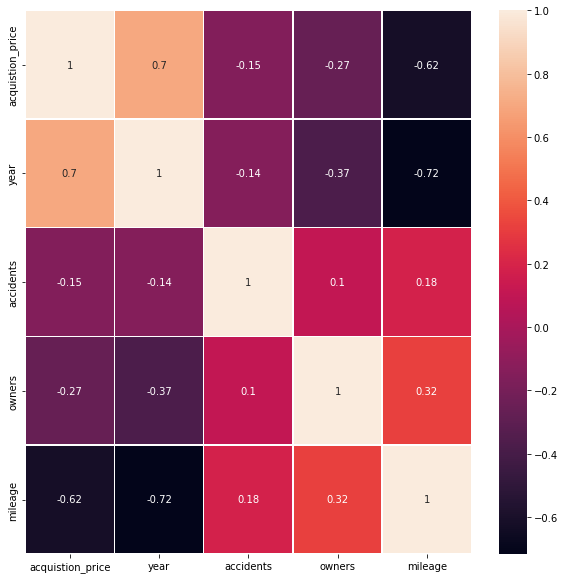

In [79]:
# correlation heatmap 
cor_feature_list = ['acquistion_price'] + cor_df['Feature'].tolist() # top 10 correalted features
corr = df[cor_feature_list].corr()
fig, ax = plt.subplots(figsize=(10,10))    
print('Correlation heatmap:','\n')     
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True
            , linewidths=.5, ax=ax)

### 2.7 Unique sellers and cars

In [80]:
# There are only 12k sellers for 639401 cars
df['seller_id'].nunique()

12000

In [81]:
# unique cars
df['car'] = df['make']+' ' + df['model']+ ' ' +df['trim']

In [82]:
df['car'].head()

0    Mazda Mazda6 Grand Touring
1          Chevrolet Impala 2LT
2       Hyundai Elantra Limited
3    Jeep Grand Cherokee Laredo
4                 Honda CR-V LX
Name: car, dtype: object

In [83]:
# There are 2040 unique cars
df['car'].nunique()

2040

In [84]:
df['make'].nunique()

40

In [85]:
df['model'].nunique()

522

### 2.8 Profit and loss of cars

In [100]:
df['net_sale_price'] = df['final_sale_price'] - df['acquistion_price']

In [87]:
print('Number of cars sold for profit:', len(df[df['net_sale_price'] > 0]))
print('Number of cars sold for loss:', len(df[df['net_sale_price'] <= 0]))


Number of cars sold for profit: 9410
Number of cars sold for loss: 2592


9410 cars are sold for profit where as 2592 cars are sold for a loss

In [88]:
print('Percentage of cars sold for profit:', round(9410*100/len(df),2))

Percentage of cars sold for profit: 78.38


In [89]:
profit_loss_dict = {'type': ['profit','loss'], 'number of cars sold': [9410,2592]}
df_pl = pd.DataFrame(profit_loss_dict)
df_pl

,type,number of cars sold
0,profit,9410
1,loss,2592


In [90]:
import plotly.graph_objects as go

pl_type = ['profit','loss']
number_car_sold = [9410,2592]
# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=pl_type, values=number_car_sold, pull=[0, 0.1])])
fig.update_traces(hoverinfo='label+percent', textinfo='label+percent+value', title='Number of cars sold for profit vs loss')

fig.show()

In [91]:
df['net_sale_price'].describe()

count    12002.000
mean      1231.277
std       1977.650
min     -12750.000
25%        250.000
50%       1250.000
75%       2400.000
max      18550.000
Name: net_sale_price, dtype: float64

Average profit made on each car is 1231 dollars.

Maximum profit made on a car is 18550 dollars.

Maximum loss made on a car is 12750 dollars.

In [93]:
df['net_sale_price'] = df['net_sale_price'].fillna(df['net_sale_price'].mean())

In [94]:
print('Total net profit made:', round(sum(df['net_sale_price'])))

Total net profit made: 14782706


Total profit made so far = ~14 million dollars

### 2.9 Duplicates

In [96]:
# delete listing date,list price, sell date 
del_cols = ['listing_date','list_price', 'sell_date']
df.drop(del_cols,axis=1,inplace=True)

In [97]:
print('Number of duplicates:', len(df)-len(df.drop_duplicates( keep='first')))

Number of duplicates: 627395


In [98]:
# drop duplciates
df = df.drop_duplicates(keep='first')
df = df.reset_index(drop=True)

### 2.10 Net profits/loss based on car make

In [105]:
df_car_make =  pd.DataFrame(df.groupby('make')['net_sale_price'].sum()).reset_index()
df_car_make.columns = ['make','total_profit_loss']
df_car_make.sort_values('total_profit_loss', ascending=False)

,make,total_profit_loss
36,Toyota,2355053.000
12,Honda,1732389.000
2,BMW,1243350.000
22,Mazda,932570.000
37,Volkswagen,834460.000
33,Subaru,784595.000
9,Ford,759274.000
26,Nissan,708038.000
19,Lexus,675295.000
23,Mercedes-Benz,628965.000


In [106]:
most_profitable_makes = df_car_make.sort_values('total_profit_loss', ascending=False)



In [109]:
most_loss_makes = most_profitable_makes[-5:]
most_profitable_makes = most_profitable_makes[:5]

In [114]:
most_profitable_makes.columns = ['make','total profit']
most_loss_makes.columns = ['make','Net']

In [112]:
most_profitable_makes

,make,total profit
36,Toyota,2355053.000
12,Honda,1732389.000
2,BMW,1243350.000
22,Mazda,932570.000
37,Volkswagen,834460.000


In [115]:
most_loss_makes

,make,Net
11,HUMMER,650.000
30,Saab,500.000
34,Suzuki,400.000
31,Saturn,-6900.000
10,GMC,-16418.000


In [103]:
# Net based on average
df_car_make =  pd.DataFrame(df.groupby('make')['net_sale_price'].mean()).reset_index()
df_car_make.sort_values('net_sale_price', ascending=False)

,make,net_sale_price
35,Tesla,3899.605
28,Porsche,2262.167
32,Scion,1824.091
39,smart,1729.000
21,MINI,1693.655
23,Mercedes-Benz,1526.614
8,FIAT,1500.158
2,BMW,1489.042
13,Hyundai,1488.085
15,Jaguar,1470.000
